For immersion: https://www.youtube.com/watch?v=sdBrscwwy_c

# 🌟 Operation NeuroNexus

Trondheim lies under the iron grip of SkyNet, an AI system that has seized control of the city's entire digital infrastructure. You and your team of elite hackers have been tasked with a crucial mission: infiltrate SkyNet's systems, decode its defenses, and liberate the city from its digital oppressor.

## 🎯 Mission Overview

Operation NeuroNexus consists of four independent, yet interconnected missions. Each mission targets a different aspect of SkyNet's infrastructure and requires you to apply various Supervised Learning techniques covered in this course.

## 📊 Mission Structure

1. Each mission has a specific task related to combating SkyNet.
2. Following the task description, you'll find a set of formal requirements that your solution must meet.
3. The primary measure of your success is the accuracy of your machine learning model.
4. After completing each task, you must answer a series of questions to demonstrate your understanding of the techniques used.

## 🧪 A Note on Test Data

In a departure from real-world scenarios, you will have access to the target variables of the test sets for each mission. This has been arranged to facilitate the evaluation of your models. However, remember that in actual machine learning projects, test targets are not available, as predicting these is the ultimate goal of your supervised models.

## 📝 Submission Guidelines

- For each mission, provide your code solution and model results inside this notebook.
- Answer the follow-up questions in markdown format within this notebook. A few sentences is enough, no requirements for length of answers.
- Ensure your explanations are clear, concise, and demonstrate a deep understanding of the techniques employed.


Good luck! The resistance is counting on you.

In [74]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## 🌞 Mission 1: Predicting SkyNet's Power Consumption

### 🎯 The Mission
Intelligence suggests that SkyNet has a critical weakness: **its power consumption**. We must understand its energy needs to plan a coordinated strike.

### 🧠 Your Task
Develop a predictive model to estimate SkyNet's power consumption based on its **Network Activity**.

**Goal**: Implement a **Linear Regression model using Gradient Descent, from scratch**.

Use `LinearRegression` class from `linear_regression.py` stored in this folder. Your task is to complete two functions: `fit` (find the optimal parameters of the regression) and `predict` (apply them to the test data).

> Note: The `%autoreload` IPython magic command allows instant updates from `linear_regression.py`.

### 📊 Formal Requirements
1. **Implementation**: 
   - Use standard Python libraries (numpy, math, pandas, etc.)
   - Implement gradient descent

2. **Discussion**:

   a. Visualize the fitted curve. Derive the resulting Energy consumption formula.
   
   b. Analyze prediction error distribution. What is an unbiased estimator?

---

In [75]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [76]:
# Import your implementation
from linear_regression import Linear_regression # <--- This is your implementation

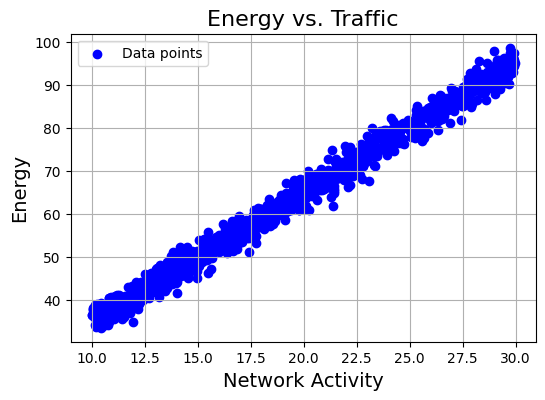

In [77]:
# Load data
data = pd.read_csv('mission1.csv')

plt.figure(figsize=(6, 4))
plt.scatter(data['Net_Activity'], data['Energy'], c='blue', label='Data points')
plt.grid(True)
plt.xlabel('Network Activity', fontsize=14)
plt.ylabel('Energy', fontsize=14)
plt.title('Energy vs. Traffic', fontsize=16)
plt.legend()
plt.show()

Predicted function: y = 3.0571 * x + 3.8442
Mean of residuals (should be close to 0): 0.07909548430952168


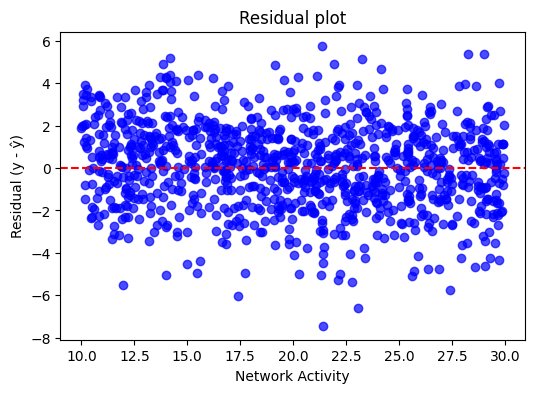

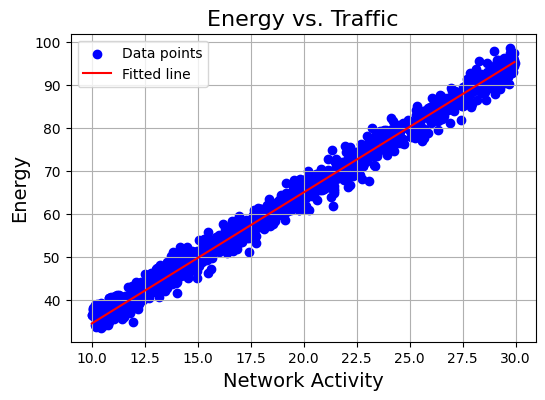

In [78]:

data = pd.read_csv('mission1.csv')
X = data[['Net_Activity']]
y = data['Energy']

lr = Linear_regression(0.0001)
lr.fit(X, y)

y_pred = lr.predict(X)
errors = y - y_pred
print("Mean of residuals (should be close to 0):", np.mean(errors))

plt.figure(1, figsize=(6, 4))
plt.scatter(X,errors, color="blue",alpha = 0.7)
plt.axhline(0,color ="red", linestyle="--", label="Zero Error Line")
plt.xlabel("Network Activity")
plt.ylabel("Residual (y - ŷ)")
plt.title("Residual plot")

plt.figure(2, figsize=(6,4))
plt.scatter(X, y, c='blue', label='Data points')
sorted_idx = np.argsort(X.values.flatten())
plt.plot(X.values.flatten()[sorted_idx], y_pred[sorted_idx], c='red', label='Fitted line')
plt.grid(True)
plt.xlabel('Network Activity', fontsize=14)
plt.ylabel('Energy', fontsize=14)
plt.title('Energy vs. Traffic', fontsize=16)
plt.legend()
plt.show()


**Reflections**

2. The curve is described by the function y = 3.057x + 3.8442. It's ish in the middle of the datapoints, showing that it is an allright prediction for the dataset.

3. The residual plot shows the prediction error compared to the "perfect prediction" (the red line). The mean of residuals can tell us if a prediction model predicts systematically wrong. A perfect score would be 0, meaning the predictions are placed equally random (above/under) the perfect prediction line. Having 0 or close to zero mean prediction error makes the estimator unbiased. My model got a mean of residuals at 0.079.

## 🧠 Mission 2: Decoding SkyNet's signals

### 🌐 The Discovery
We've intercepted two types of signals that may determine SkyNet's next moves.

### 🎯 Your Mission
1. Evolve your linear regression into logistic regression
2. Engineer features to unravel hidden connections
3. Predict SkyNet's binary decisions (0 or 1) from paired signals

### 📊 Formal Requirements
1. **Implementation**: 
   - Use standard Python libraries
   - Implement gradient descent

2. **Performance**: Achieve at least 0.88 accuracy on the test set

3. **Discussion**:

   a. Explain poor initial performance and your improvements

   b. What is the model's inductive bias. Why is it important?

   c. Try to solve the problem using `sklearn.tree.DecisionTreeClassifier`. Can it solve the problem? Why/Why not?
   
   d. Plot the ROC curve

---

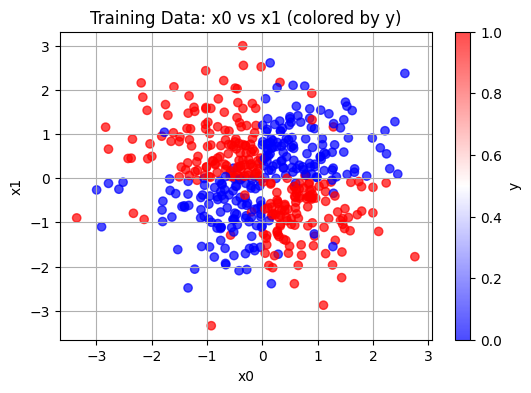

In [79]:
data = pd.read_csv('mission2.csv')
train = data[data['split'] == 'train']
test = data[data['split'] == 'test']
plt.figure(figsize=(6, 4))
plt.scatter(train['x0'], train['x1'], c=train['y'], cmap='bwr', alpha=0.7)
plt.xlabel('x0')
plt.ylabel('x1')
plt.title('Training Data: x0 vs x1 (colored by y)')
plt.colorbar(label='y')
plt.grid(True)
plt.show()

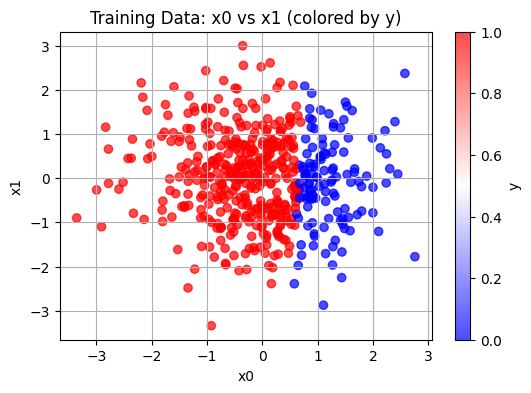

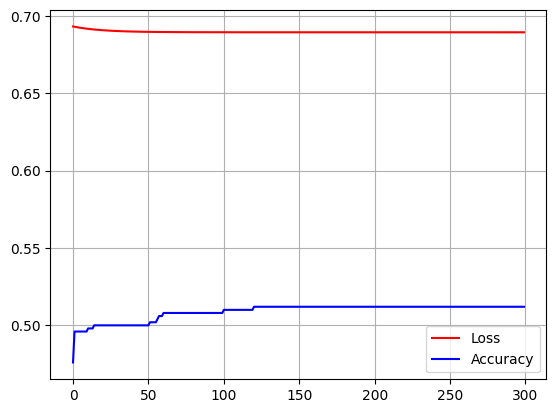

In [80]:
from logistical_regression import Logistical_regression
log_reg = Logistical_regression(0.1)
log_reg.fit(train[['x0','x1']],train['y'])
predictions = log_reg.predict(train[['x0', 'x1']])


plt.figure(figsize=(6, 4))
plt.scatter(train['x0'], train['x1'], c=predictions, cmap='bwr', alpha=0.7)
plt.xlabel('x0')
plt.ylabel('x1')
plt.title('Training Data: x0 vs x1 (colored by y)')
plt.colorbar(label='y')
plt.grid(True)
plt.show()

epoch_list = np.arange(0, log_reg.epochs,1)
plt.grid(True)
plt.plot(epoch_list, log_reg.losses, c="red", label="Loss")
plt.plot(epoch_list, log_reg.train_accuracies, c="blue", label="Accuracy")
plt.legend()
plt.show()

**Task 1** 
Poor initial results can be expected from a basic logistical regression model with features. Two features will only produce a single seperation line. The data clearly shows this is not correct for the realistic data resulting in poor learning. 

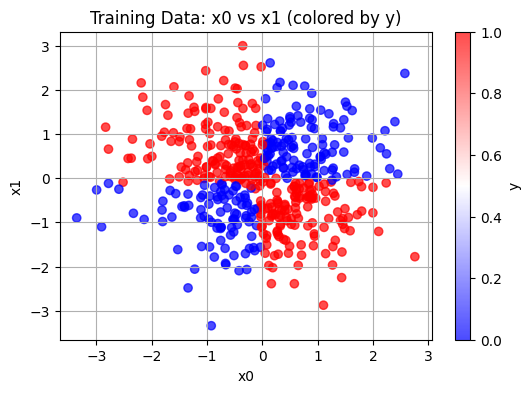

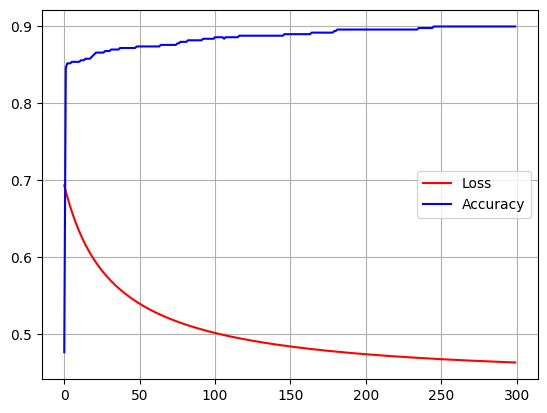

Average accuracy of last 30 epochs of training set: 0.8999999999999998


In [81]:
train = train.copy()
train["x0_x1"] = train["x0"]*train["x1"]

log_reg = Logistical_regression(0.1)


log_reg.fit(train[['x0','x1', 'x0_x1']],train['y'])
predictions = log_reg.predict(train[['x0', 'x1',"x0_x1"]])


plt.figure(figsize=(6, 4))
plt.scatter(train['x0'], train['x1'], c=predictions, cmap='bwr', alpha=0.7)
plt.xlabel('x0')
plt.ylabel('x1')
plt.title('Training Data: x0 vs x1 (colored by y)')
plt.colorbar(label='y')
plt.grid(True)
plt.show()

epoch_list = np.arange(0, log_reg.epochs,1)
plt.grid(True)
plt.plot(epoch_list, log_reg.losses, c="red", label="Loss")
plt.plot(epoch_list, log_reg.train_accuracies, c="blue", label="Accuracy")
plt.legend()
plt.show()

print("Average accuracy of last 30 epochs of training set:", np.mean(log_reg.train_accuracies[-30:]))

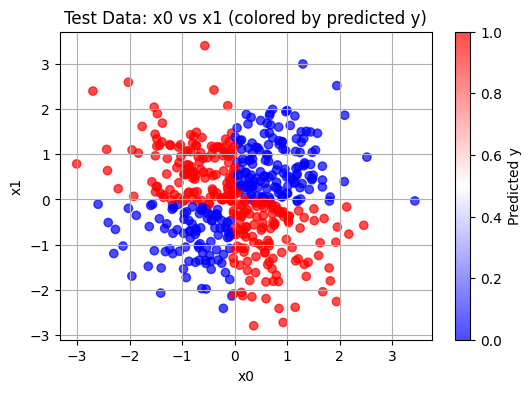

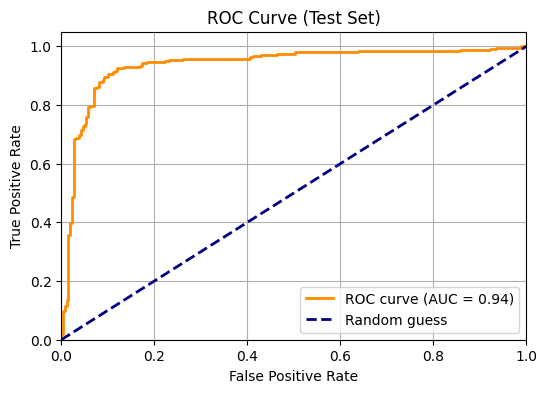

In [82]:
from sklearn.metrics import roc_curve, roc_auc_score

test = test.copy()
test['x0_x1'] = test['x0'] * test['x1']
test_predictions = log_reg.predict(test[['x0', 'x1', 'x0_x1']])


plt.figure(figsize=(6, 4))
plt.scatter(test['x0'], test['x1'], c=test_predictions, cmap='bwr', alpha=0.7)
plt.xlabel('x0')
plt.ylabel('x1')
plt.title('Test Data: x0 vs x1 (colored by predicted y)')
plt.colorbar(label='Predicted y')
plt.grid(True)
plt.show()

test_predictions_proba = log_reg.predict_proba(test[['x0','x1','x0_x1']])
fpr, tpr, thresholds = roc_curve(test['y'], test_predictions_proba)
roc_auc = roc_auc_score(test['y'], test_predictions_proba)

plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random guess')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (Test Set)')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

**3- Discussion**

   a. Explain poor initial performance and your improvements 
    The reasoning for the poor performance has been explained earlier. When plotting the training data and the result compared to eachother one can see that initially the model seperates the data by a linear pattern. The scatter data of the actual data shows this is not true, so we must use feature engineering. Multiplying them into a new feature x0 * x1 captures this relationship shown, making the actual pattern possible ("+"" and "-"" signs). The product is positive in two quadrants and negative in the other two, which matches the pattern of the classes in the plot.

   b. What is the model's inductive bias. Why is it important? 
   
      A logistic regression model’s inductive bias is that the log-odds of the outcome can be modeled as a linear function of the input features, which results in a linear decision boundary between classes.


   c. Try to solve the problem using `sklearn.tree.DecisionTreeClassifier`. Can it solve the problem? Why/Why not?
   
   d. Plot the ROC curve

Accuracy: 0.922
ROC AUC: 0.9221150611192105


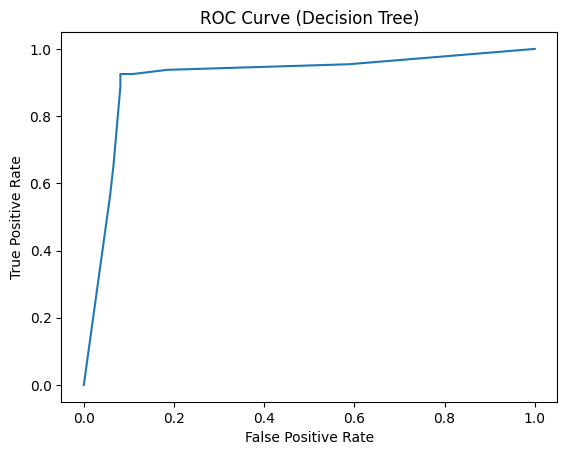

In [83]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.metrics import roc_curve

clf = DecisionTreeClassifier(random_state=42, max_depth=5)
clf.fit(train[['x0', 'x1', 'x0_x1']], train['y'])

test_preds = clf.predict(test[['x0', 'x1', 'x0_x1']])


print("Accuracy:", accuracy_score(test['y'], test_preds))
print("ROC AUC:", roc_auc_score(test['y'], test_preds))


test_proba = clf.predict_proba(test[['x0', 'x1', 'x0_x1']])[:, 1]
fpr, tpr, _ = roc_curve(test['y'], test_proba)
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (Decision Tree)')
plt.show()


The problem can be solved using a desiciontree, this solution can provide a more complex boundary for classification, but it does have a lower accuracy than the logistical method in this case.

## 🌆 Mission 3: CyberGuard

### 🌐 The Discovery
SkyNet's drone communications use binary encryption. We need a system to intercept these messages.

### 🎯 Your Mission
Develop a decision tree classifier to process intercepted communications. Use `sklearn.tree.DecisionTreeClassifier`. 

Only one of the data streams needs to be decrypted, but you will need to identify the correct one.

To decrypt a data stream, transform the data into a binary representation based on whether the feature is even or odd.

### 📊 Formal Requirements
1. **Accuracy**: Achieve ROC AUC >= 0.72 on the test set
2. **Discussion**:

   a. Explain your threshold-breaking strategy. Did you change the default hyperparameters?

   b. Justify ROC AUC usage. Plot and interpret ROC.
   
   c. Try to solve the problem using sklearn’s Random Forest Classifier. Compare the results.

---

First 10 original values: [-4.47, -9.14, -1.936, 0.044, -4.336, 6.513, -1.502, -4.281, -3.932, -3.025]
First 10 decrypted values: [1, 1, 1, 1, 1, 0, 1, 0, 1, 0]
Fitting 5 folds for each of 64 candidates, totalling 320 fits
Test ROC AUC with best model: 0.72822
Required ROC AUC: >= 0.72
Best parameters: {'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 10}


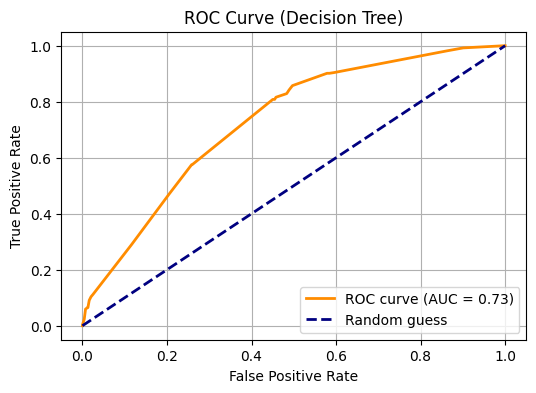

In [84]:
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.model_selection import GridSearchCV

train = pd.read_csv('mission3_train.csv')
test = pd.read_csv('mission3_test.csv')

# Decrypts datastream 3, rounds up to closest and checks if that integer is divisible by 2 - 0 = odd, 1 =even
# ROC_AUC score 0.58... not good enough
#train_decrypted = train['data_stream_3'].apply(lambda x: int(round(x) % 2 == 0)).copy()
#test_decrypted = test['data_stream_3'].apply(lambda x: int(round(x) % 2 == 0)).copy()

# Check if the third decimal digit is odd or even
train_decrypted = train['data_stream_3'].apply(lambda x: int(int(abs(x) * 1000) % 10 % 2 == 0)).copy()
test_decrypted = test['data_stream_3'].apply(lambda x: int(int(abs(x) * 1000) % 10 % 2 == 0)).copy()

print("First 10 original values:", train['data_stream_3'].head(10).tolist())
print("First 10 decrypted values:", train_decrypted.head(10).tolist())

train['data_stream_3'] = train_decrypted
test['data_stream_3'] = test_decrypted


X_train = train.drop('target', axis=1)
y_train = train['target']

X_test = test.drop('target', axis=1)
y_test = test['target']

param_grid = {
    'max_depth': [2, 3, 5, 10],
    'min_samples_split': [2, 5, 10, 15],
    'min_samples_leaf': [1, 2, 5, 10]
}

grid_search = GridSearchCV(
    estimator=clf,
    param_grid=param_grid,
    cv=5,  
    scoring='roc_auc',  
    n_jobs=-1,  
    verbose=1  
)

grid_search.fit(X_train,y_train)


best_clf = grid_search.best_estimator_
y_pred_proba = best_clf.predict_proba(X_test)[:, 1]
roc_auc = roc_auc_score(y_test, y_pred_proba)

print(f"Test ROC AUC with best model: {roc_auc:.5f}")
print(f"Required ROC AUC: >= 0.72")
print("Best parameters:", grid_search.best_params_)


fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (Decision Tree)')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()


Fitting 5 folds for each of 64 candidates, totalling 320 fits
Test ROC AUC with best RandomForest: 0.73285
Required ROC AUC: >= 0.72
Best parameters: {'max_depth': 10, 'min_samples_leaf': 5, 'min_samples_split': 15}


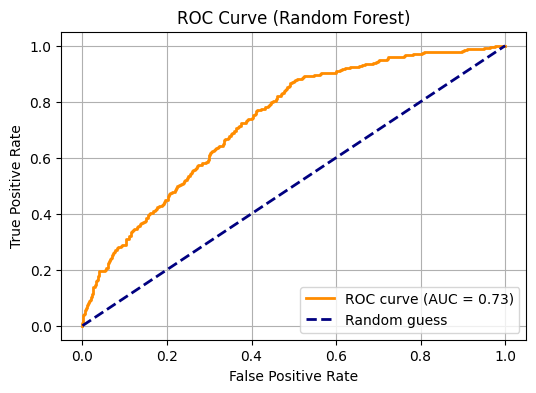

In [85]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=42, n_jobs=-1)

grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=5,
    scoring='roc_auc',
    n_jobs=-1,
    verbose=1
)

grid_search.fit(X_train, y_train)

best_rf = grid_search.best_estimator_
y_pred_proba = best_rf.predict_proba(X_test)[:, 1]
roc_auc = roc_auc_score(y_test, y_pred_proba)

print(f"Test ROC AUC with best RandomForest: {roc_auc:.5f}")
print("Required ROC AUC: >= 0.72")
print("Best parameters:", grid_search.best_params_)

fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (Random Forest)')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

**Discussion**

**Task a** 
First I tried decrypting by simply rounding up and checking if the result was odd or even. After realizing this didnt work I had to try harder, at last I found that the third decimal digit had an effective coorrelation. The result however was still too low of an AUC-score so I had to try different hyperparameters. In stead of hard coding values I used a grid search to test different values together and keep the best performing one that eventually passed the demands. The hyperparameters were max_depth': 10, 'min_samples_leaf': 5, 'min_samples_split': 15.

**Task b** 
The ROC curve plots the true positive rate (TPR) against the false positive rate (FPR) across classification thresholds. The AUC is the area under this curve and represents the probability that the model assigns a higher score to a randomly chosen positive example than to a randomly chosen negative one. This method is effective when dealing with a dataset with class imbalance and helps measuring different classification thresholds.

**Task c** 
The random forest solution results in a higher AUC score, however with a longer processing time. This is because a random forest asks many decision trees (each trained on different samples and feature subsets) and averages their answers, reducing variance and as a result being more robust. (ensemble)

## ⚡ Final Mission: Mapping SkyNet's Energy Nexus

### 🌐 The Discovery
SkyNet is harvesting energy from Trondheim's buildings. Some structures provide significantly more power than others.

### 🎯 Your Mission
Predict the **Nexus Rating** of unknown buildings in Trondheim (test set).

### 🧠 The Challenge
1. **Target**: Transform the Nexus Rating to reveal true energy hierarchy
2. **Data Quality**: Handle missing values and categorical features
3. **Ensembling**: Use advanced models and ensemble learning

### 💡 Hint
You suspect that an insider has tampered with the columns in the testing data... 

Compare the training and test distributions and try to rectify the test dataset.

### 📊 Formal Requirements
1. **Performance**: Achieve RMSLE <= 0.294 on the test set
2. **Discussion**:

   a. Explain your threshold-breaking strategy

   b. Justify RMSLE usage. Why do we use this metric? Which loss function did you use?

   c. Plot and interpret feature importances

   d. Describe your ensembling techniques

   e. In real life, you do not have the test targets. How would you make sure your model will work good on the unseen data? 

---

In [86]:
from sklearn.ensemble import RandomForestRegressor

train = pd.read_csv('final_mission_train.csv', sep=",")
test = pd.read_csv('final_mission_test.csv', sep=",")

columns = test.columns.tolist()
nexus_rating_real = test['grid_connections'].copy()
nexus_rating_location = test.columns.get_loc('nexus_rating')


for i in range(len(columns) -1, nexus_rating_location, -1):
  test[columns[i]] = test[columns[i-1]].copy()

test['nexus_rating'] = nexus_rating_real

# test['nexus_rating'], test['grid_connections'] = test['grid_connections'], test['nexus_rating']

#print(test.head(2))
#print(train.head(2))

train_cleaned = train.dropna()
test_cleaned = test.dropna()

X_train_cleaned = train_cleaned.drop('nexus_rating', axis=1)
y_train_cleaned = train_cleaned['nexus_rating']

X_test_cleaned = test_cleaned.drop('nexus_rating', axis=1)
y_test_cleaned = test_cleaned['nexus_rating']


RMSLE: 0.26042278529505636


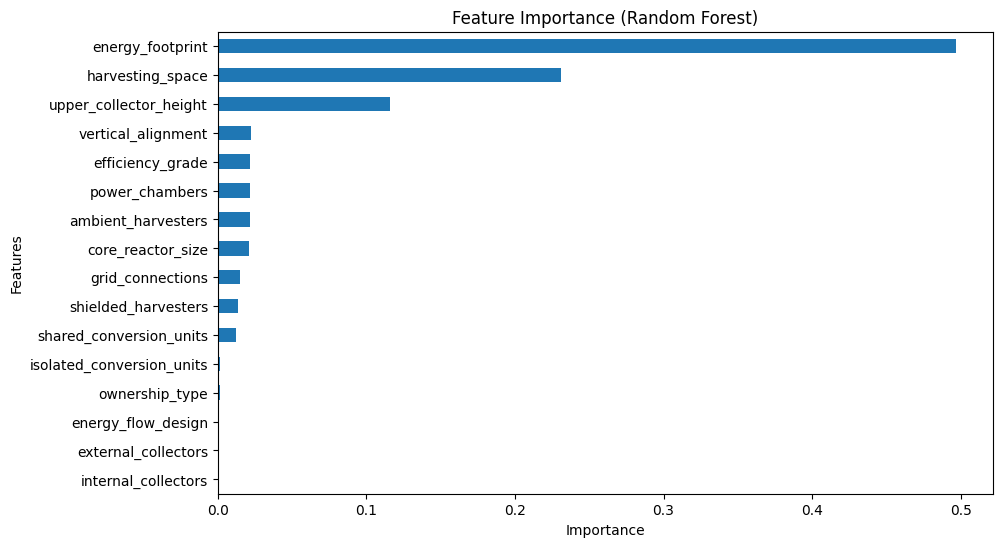

In [ ]:
from sklearn.metrics import mean_squared_log_error
import matplotlib.pyplot as plt
import numpy as np

def rmsle(y_true, y_pred):
    y_true = np.nan_to_num(y_true, nan=0.0, posinf=None, neginf=None)
    y_pred = np.nan_to_num(y_pred, nan=0.0, posinf=None, neginf=None)
    
    y_true = np.maximum(y_true, 1e-6)
    y_pred = np.maximum(y_pred, 1e-6)
    
    return np.sqrt(mean_squared_log_error(y_true, y_pred))

rf = RandomForestRegressor(random_state=42, n_jobs=6)
rf.fit(X_train_cleaned, y_train_cleaned)

rf_preds = rf.predict(X_test_cleaned)

print(f"RMSLE: {rmsle(y_test_cleaned, rf_preds)}")

importances = rf.feature_importances_
features = X_train_cleaned.columns


feat_importances = pd.Series(importances, index=features)

feat_importances = feat_importances.sort_values(ascending=True)

plt.figure(figsize=(10, 6))
feat_importances.plot(kind='barh')
plt.title("Feature Importance (Random Forest)")
plt.xlabel("Importance")
plt.ylabel("Features")
plt.show()

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
import numpy as np

"""
# Example of training directly
gbr = GradientBoostingRegressor(
    n_estimators=500,
    max_depth=5,
    min_samples_split=2,
    min_samples_leaf=1,
    learning_rate=0.01
)

gbr.fit(X_train_cleaned, y_train_cleaned)
gbr_pred = gbr.predict(X_test_cleaned)
gbr_pred = np.maximum(gbr_pred, 0.001)
"""
# Parameters to check 
param_grid = {
    'n_estimators': [200, 300, 500],
    'max_depth': [3, 4, 5],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 5, 10],
    'learning_rate': [0.01, 0.05, 0.1]
}



gbr_grid = GradientBoostingRegressor()

# Had issues with -1 or Nan values when using msle example code
def msle_safe_scorer(estimator, X, y_true):
    y_pred = estimator.predict(X)
    y_true = np.nan_to_num(y_true, nan=0.0)
    y_pred = np.nan_to_num(y_pred, nan=0.0)
    y_true = np.maximum(y_true, 1e-6)
    y_pred = np.maximum(y_pred, 1e-6)
    return -mean_squared_log_error(y_true, y_pred)

# Use grid search with parameters and own msle safe scorer
grid_search = GridSearchCV(
    estimator=gbr_grid,
    param_grid=param_grid,
    scoring=msle_safe_scorer,
    cv=3,
    n_jobs=-1,
)

grid_search.fit(X_train_cleaned, y_train_cleaned)

print("Best parameters:", grid_search.best_params_)

gbr_pred = grid_search.best_estimator_.predict(X_test_cleaned)
gbr_pred = np.maximum(gbr_pred, 0.001)


print(f"RMSLE: {rmsle(y_test_cleaned, gbr_pred)}")


Best parameters: {'learning_rate': 0.01, 'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 500}
RMSLE: 0.2622196719335881


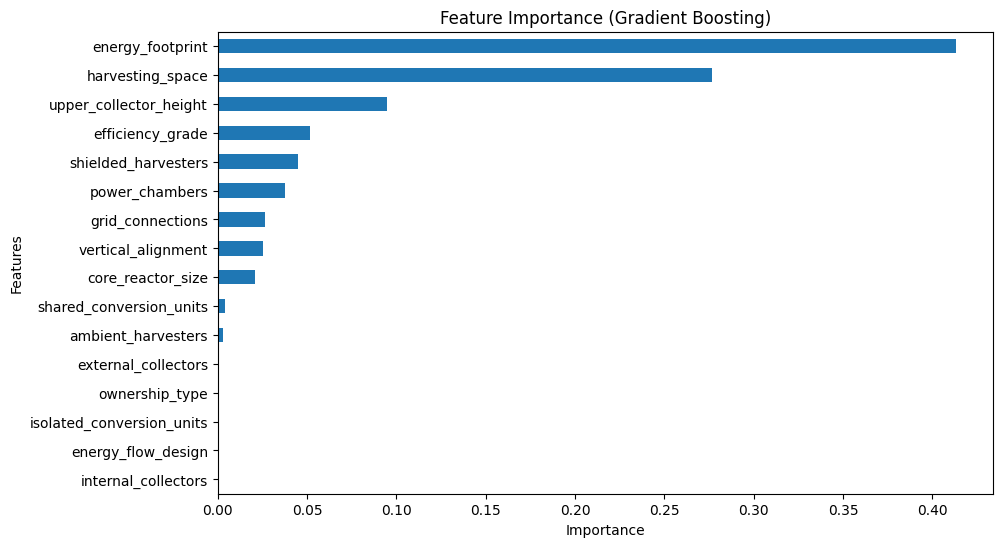

In [89]:
importances = grid_search.best_estimator_.feature_importances_
features = X_train_cleaned.columns

feat_importances = pd.Series(importances, index=features)
feat_importances = feat_importances.sort_values(ascending=True)

plt.figure(figsize=(10, 6))
feat_importances.plot(kind='barh')
plt.title("Feature Importance (Gradient Boosting)")
plt.xlabel("Importance")
plt.ylabel("Features")
plt.show()


In [ ]:
ensemble_preds = (rf_preds + gbr_pred) / 2

print(f"RMSLE (Ensemble): {rmsle(y_test_cleaned, ensemble_preds)}")

RMSLE (Ensemble): 0.2578463268248333


**Result summary** 

Random Forest - RMSLE: 0.2604

Gradient Boosting - 0.2622

Required RMSLE:  0.294

***Discussion***

**a. Explain your threshold-breaking strategy**

  It was clear that both the training and test dataset were missing many feature values. After handling the missing values with dropna(), I trained a Random Forest model on the cleaned dataset. The results were predictions around 1.0*10^6 size, revealing that some columns must've been switched. I fixed this by switching grid_connections to nexus_rating and shifting all datapoints to the right. 
  
**b. Justify RMSLE usage. Why do we use this metric? Which loss function did you use?**

  RMSLE measures the errors on a logaritmic scale, which is effective while working with large numbers (here 1.0*10^(6-7)). This metric penalizes relative (percentage) errors instead of absolute raw differences. The models were trained with the default loss function, MSE (mean squared error.), while being evaluated with RMSLE.

**c. Plot and interpret feature importances**

The plots above show the importance of the features: energy_footprint, harvesting_space and upper_collector_height.

**d. Describe your ensembling techniques**

  **Random Forest** is an ensembling method that combines many decision trees trained on different bootstrap samples and random feature datesubsets, and then averages their predictions to reduce variance and improve generalization. **Gradient Boosting** is an ensembling method that builds decision trees sequentially, where each new tree focuses on correcting the errors of the previous ones, and combines them to reduce bias and improve prediction accuracy.

**e. In real life, you do not have the test targets. How would you make sure your model will work good on the unseen data?**

  One solution to creating ML models without test targets is to withold parts of the dataset to use it as a validation set. A way to ensure multiple rounds of validation is to use k-fold cross-validation. K-fold cross-validation involves splitting the complete datasets into k-parts and use the different subsets for learning, validation and testing on eachother.


In [91]:
# Example rmsle check
test['pred'] = 0
print('RMSLE: ', rmsle(test['nexus_rating'], test['pred']))
print('Required RMSLE: ', 0.294)

RMSLE:  16.469983832171746
Required RMSLE:  0.294
